# Chapter 3  Classification

## 3.1 Logistic Curve 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn # Gaussian Random Number

In [2]:
def f(x):
    return np.exp(beta_0+beta*x)/(1+np.exp(beta_0+beta*x))

In [3]:
beta_0=0
beta_seq=np.array([0,0.2,0.5,1,2,10])
x_seq=np.arange(-10,10,0.1)

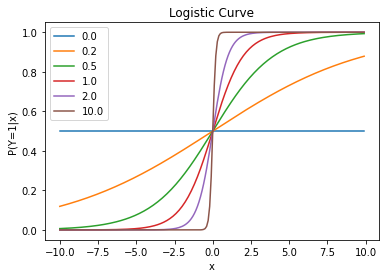

In [4]:
plt.xlabel("x")
plt.ylabel("P(Y=1|x)")
plt.title("Logistic Curve")
for i in range(beta_seq.shape[0]):
    beta=beta_seq[i]
    p=f(x_seq)
    plt.plot(x_seq,p,label='{}'.format(beta))
plt.legend(loc='upper left')

## 3.2 Newton-Rapson Method 

In [6]:
def f(x):
    return x**2-1
def df(x):
    return 2*x

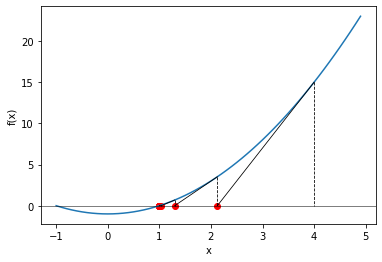

In [7]:
x_seq=np.arange(-1,5,0.1)
f_x=f(x_seq)
plt.plot(x_seq,f_x)
plt.axhline(y=0,c="black",linewidth=0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
x=4
for i in range(10):
    X=x;Y=f(x)  
    x=x-f(x)/df(x) #x Before Update
    y=f(x)         #y After Update
    plt.plot([X,x],[Y,0],c="black",linewidth=0.8)
    plt.plot([X,X],[Y,0],c="black",linestyle="dashed",linewidth=0.8)
    plt.scatter(x,0,c="red")

In [8]:
def f(z):
    return z[0]**2+z[1]**2-1
def dfx(z):
    return 2*z[0]
def dfy(z):
    return 2*z[1]
def g(z):
    return z[0]+z[1]
def dgx(z):
    return 1
def dgy(z):
    return 1

In [9]:
z=np.array([3,4]) # initial value
for i in range(10):
    J=np.array([[dfx(z),dfy(z)],[dgx(z),dgy(z)]])
    z=z-np.linalg.inv(J)@np.array([f(z),g(z)])

In [10]:
z

array([-0.70710678,  0.70710678])

In [11]:
N=1000;p=2
X=randn(N,p) 
X=np.insert(X, 0, 1, axis=1)

In [12]:
beta=randn(p+1)
y=[]
prob=1/(1+np.exp(X@beta))
for i in range(N):
    if (np.random.rand(1)>prob[i]):
        y.append(1)
    else :
        y.append(-1)
# Data has been gererated
beta # Check the value

array([-0.24150824,  1.95678073,  0.66768006])

In [14]:
# Maximum Likelihood
beta=np.inf
gamma=randn(p+1) # the initial value of beta
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s=X@beta
    v=np.exp(-s*y)
    u=(y*v)/(1+v)
    w=v/((1+v)**2)
    W=np.diag(w)
    z=s+u/w
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[ 0.34108402 -0.45628621 -0.01961238]
[-0.30760136  1.43124859  0.44778477]
[-0.27109499  1.78223789  0.63424112]
[-0.27206807  1.86128615  0.67169297]
[-0.27228545  1.8644098   0.67308865]


In [17]:
# Data Generation
n=100
x=np.concatenate([randn(n)+1,randn(n)-1],0)
y=np.concatenate([np.ones(n), -np.ones(n)], 0)

In [18]:
train=np.random.choice(2*n,int(n),replace=False) # Index for the training data
test=list(set(range(2*n))-set(train))     # Index for the test data 
X=np.insert(x[train].reshape(-1,1), 0, 1, axis=1)
Y=y[train]
# two columns with the leftmost consisting of ones

In [21]:
# It does not converge for some gamma initial values, and may execute more than once.
p=1
beta=[0,0]; gamma=randn(p+1)
print(gamma)
while (np.sum((beta-gamma)**2)>0.001):
    beta=gamma
    s=X@beta
    v=np.exp(-s*Y)
    u=(Y*v)/(1+v)
    w=v/((1+v)**2)
    W=np.diag(w)
    z=s+u/w
    gamma=np.linalg.inv(X.T@W@X)@X.T@W@z
    print (gamma)

[0.76515335 0.95982195]
[-0.04893571  1.42095578]
[-0.23763931  1.81399204]
[-0.28459454  1.94452606]
[-0.28761625  1.95497717]


In [22]:
def table_count(m,u,v):
    n=u.shape[0]
    count=np.zeros([m,m])
    for i in range(n):
        count[int(u[i]),int(v[i])]+=1
    return(count)

In [23]:
ans=y[test] # Correct Answer
pred=np.sign(gamma[0]+x[test]*gamma[1])  # Prediction
ans=(ans+1)/2   # from -1,1 to 0,1
pred=(pred+1)/2   # from -1,1 to 0,1
table_count(2,ans, pred)

array([[44.,  8.],
       [10., 38.]])

## 3.3  Linear and Quadratic Discrimination 

In [24]:
np.zeros([2,2])

array([[0., 0.],
       [0., 0.]])

In [25]:
# True Parameters
mu_1=np.array([2,2]); sigma_1=2; sigma_2=2; rho_1=0
mu_2=np.array([-3,-3]); sigma_3=1; sigma_4=1; rho_2=-0.8

In [26]:
# Generate Data based on the true parameters
n=100
u=randn(n);v=randn(n)
x_1=sigma_1*u+mu_1[0]; y_1=(rho_1*u+np.sqrt(1-rho_1**2)*v)*sigma_2+mu_1[1]
u=randn(n);v=randn(n)
x_2=sigma_3*u+mu_2[0]; y_2=(rho_2*u+np.sqrt(1-rho_2**2)*v)*sigma_4+mu_2[1]

In [27]:
#  Estimate the parameters from data
mu_1=np.average((x_1,y_1),1); mu_2=np.average((x_2,y_2),1)
df=np.array([x_1,y_1]); mat=np.cov(df,rowvar=1); inv_1=np.linalg.inv(mat); de_1=np.linalg.det(mat)  #
df=np.array([x_2,y_2]); mat=np.cov(df,rowvar=1); inv_2=np.linalg.inv(mat); de_2=np.linalg.det(mat)  #

In [28]:
# Substitute the estimated parameters to the distributions
def f(x,mu,inv,de):
    return(-0.5*(x-mu).T@inv@(x-mu)-0.5*np.log(de))
def f_1(u,v):
    return f(np.array([u,v]),mu_1, inv_1, de_1)
def f_2(u,v):
    return f(np.array([u,v]),mu_2, inv_2, de_2)

In [29]:
# Contour Data
# Draw the border along which this value is zero
pi_1=0.5; pi_2=0.5
u=v=np.linspace(-6,6,50)
m=len(u)
w=np.zeros([m,m])
for i in range(m):
    for j in range(m):
        w[i,j]=np.log(pi_1)+f_1(u[i],v[j])-np.log(pi_2)-f_2(u[i],v[j])

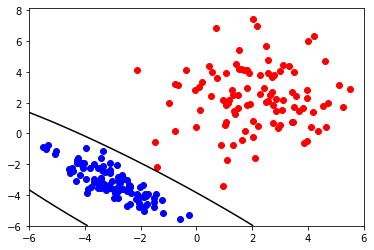

In [30]:
# Plot the borders and data
plt.contour(u,v,w,levels=0,colors=['black'])
plt.scatter(x_1,y_1,c="red")
plt.scatter(x_2,y_2,c="blue")

In [31]:
#  Change the line marked by # as follows
xx=np.concatenate((x_1-mu_1[0],x_2-mu_2[0]),0).reshape(-1,1)
yy=np.concatenate((y_1-mu_1[1],y_2-mu_2[1]),0).reshape(-1,1)
df=np.concatenate((xx,yy),1) # connect the data horizontally
mat=np.cov(df,rowvar=0)      # Specify zero because of the horizontal direction 
inv_1=np.linalg.inv(mat)
de_1=np.linalg.det(mat)
inv_2=inv_1;de_2=de_1

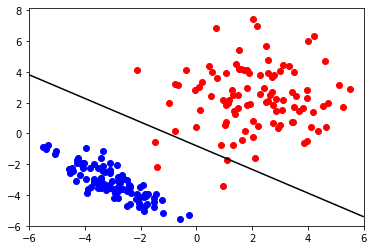

In [32]:
w=np.zeros([m,m])
for i in range(m):
    for j in range(m):
        w[i,j]=np.log(pi_1)+f_1(u[i],v[j])-np.log(pi_2)-f_2(u[i],v[j])
plt.contour(u,v,w,levels=1,colors=['black'])
plt.scatter(x_1,y_1,c="red")
plt.scatter(x_2,y_2,c="blue")

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target
n=len(x)
train=np.random.choice(n,int(n/2),replace=False)
test=list(set(range(n))-set(train))

In [34]:
## Estimate the parameters
X=x[train,:]
Y=y[train]
mu=[]
covv=[]
for j in range(3):
    xx=X[Y==j,:]
    mu.append(np.mean(xx,0))
    covv.append(np.cov(xx,rowvar=0))

In [35]:
## The definitions of the distribution into which the estimated parameters are substituted. 
def f(w,mu,inv,de):
    return -0.5*(w-mu).T@inv@(w-mu)-0.5*np.log(de)
def g(v,j):
    return f(v,mu[j],np.linalg.inv(covv[j]),np.linalg.det(covv[j]))

In [36]:
z=[]
for i in test:
    z.append(np.argsort([-g(x[i,],0),-g(x[i,],1),-g(x[i,],2)])[0])

In [37]:
table_count(3,y[test],z)

array([[29.,  0.,  0.],
       [ 0., 23.,  2.],
       [ 0.,  0., 21.]])

## 3.4  K-Nearest Neighbour

In [38]:
def knn_1(x,y,z,k):
    x=np.array(x); y=np.array(y)
    dis=[]
    for i in range(x.shape[0]):
        dis.append(np.linalg.norm(z-x[i,]))
    S=np.argsort(dis)[0:k]  # The nearest k indexes
    u=np.bincount(y[S])     # Count the occurency
    m = [i for i, x in enumerate(u) if x == max(u)] # mode index
    # tie-breaking (when more than one mode indexes)
    while (len(m)>1):
        k=k-1
        S=S[0:k]
        u=np.bincount(y[S])
        m = [i for i, x in enumerate(u) if x == max(u)] # mode index
    return m[0]

In [39]:
# Generalization
def knn(x,y,z,k):
    w=[]
    for i in range(z.shape[0]):
        w.append(knn_1(x,y,z[i,],k))
    return w

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target

In [41]:
n=x.shape[0]
train=np.random.choice(n, int(n/2), replace=False)
test=list(set(range(n))-set(train))

In [42]:
w=knn(x[train,],y[train],x[test,],k=3)
table_count(3,y[test],w)

array([[22.,  0.,  0.],
       [ 0., 27.,  1.],
       [ 0.,  2., 23.]])

## 3.5 ROC Curve

In [43]:
N_0=10000;N_1=1000
mu_1=1;mu_0=-1  # sick == 1，normal == 0
var_1=1;var_0=1
x=np.random.normal(mu_0,var_0,N_0)
y=np.random.normal(mu_1,var_1,N_1)

In [44]:
theta_seq=np.exp(np.arange(-10,100,0.1))

In [45]:
U=[]; V=[]
for i in range(len(theta_seq)):
    u=np.sum((stats.norm.pdf(x,mu_1,var_1)/stats.norm.pdf(x,mu_0,var_0))>theta_seq[i])/N_0 # Regard sick as healthy
    v=np.sum((stats.norm.pdf(y,mu_1,var_1)/stats.norm.pdf(y,mu_0,var_0))>theta_seq[i])/N_1 # regard sick as sick
    U.append(u); V.append(v)

In [46]:
AUC=0 # Calculate the Area
for i in range(len(theta_seq)-1):
    AUC=AUC+np.abs(U[i+1]-U[i])*V[i]

Text(0.3, 0.5, 'AUC=0.9206226000000002')

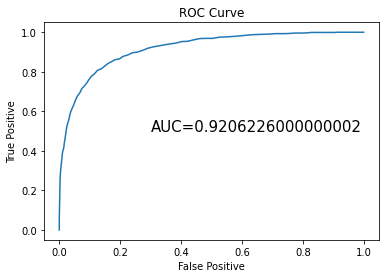

In [48]:
plt.plot(U,V)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.text( 0.3,0.5, 'AUC={}'.format(AUC),fontsize=15)